In [5]:
from common.neural_embedding import *
from common.network_analysis import *
from utils.file_utils import *
import matplotlib.pyplot as plt

### 1. Load data. ###

In [2]:
# Load edge list
global_edge_table = pd.read_csv('data/processed_data/global_edge_list.csv')
global_edge_list = list(global_edge_table.itertuples(index = False, name = None))

print(len(global_edge_list))

285574


### 2. Train embedding neural network. ###

In [3]:
# List of (k_in, k_out)
k_list = [(2, 1),
          (3, 1),
          (5, 1),
          (10, 1)]

# k_list = [(2, 1)]

embedding_vector_dim_list = [5, 10, 20, 30]
# embedding_vector_dim_list = [20]

filtered_edge_list_kin2 = remove_low_degree_nodes(global_edge_list, 2, 1)
filtered_edge_list_kin3 = remove_low_degree_nodes(global_edge_list, 3, 1)
filtered_edge_list_kin5 = remove_low_degree_nodes(global_edge_list, 5, 1)
filtered_edge_list_kin10 = remove_low_degree_nodes(global_edge_list, 10, 1)

# Reweight edge list
weighted_edge_to_weight_dict_kin10 = re_weight_edges(filtered_edge_list_kin10)
weighted_edge_to_weight_list_kin10 = list(weighted_edge_to_weight_dict_kin10.items())

weighted_edge_to_weight_dict_kin5 = re_weight_edges(filtered_edge_list_kin5)
weighted_edge_to_weight_list_kin5 = list(weighted_edge_to_weight_dict_kin5.items())

weighted_edge_to_weight_dict_kin3 = re_weight_edges(filtered_edge_list_kin3)
weighted_edge_to_weight_list_kin3 = list(weighted_edge_to_weight_dict_kin3.items())

weighted_edge_to_weight_dict_kin2 = re_weight_edges(filtered_edge_list_kin2)
weighted_edge_to_weight_list_kin2 = list(weighted_edge_to_weight_dict_kin2.items())

# Training configurations.
epoch_num = 15
batch_size = 128
file_directory = 'data/output_data/'
device = ("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")

# Train with re-weighted dateset.
dim_to_loss_history_kin10 = train_network_with_reweighted_dataset(file_directory + 're-weight_kin10/', weighted_edge_to_weight_list_kin10, embedding_vector_dim_list, epoch_num, batch_size)

dim_to_loss_history_kin5 = train_network_with_reweighted_dataset(file_directory + 're-weight__kin5/', weighted_edge_to_weight_list_kin5, embedding_vector_dim_list, epoch_num, batch_size)

dim_to_loss_history_kin3 = train_network_with_reweighted_dataset(file_directory + 're-weight__kin3/', weighted_edge_to_weight_list_kin3, embedding_vector_dim_list, epoch_num, batch_size)

dim_to_loss_history_kin2 = train_network_with_reweighted_dataset(file_directory + 're-weight__kin2/', weighted_edge_to_weight_list_kin2, embedding_vector_dim_list, epoch_num, batch_size)

# Train with low-degree-node-reduced dateset.
# k_dim_to_loss_history = train_network_with_filtered_dataset(file_directory, global_edge_list, k_list, embedding_vector_dim_list, epoch_num, batch_size)

Input dimension is 164.
Hidden dimension is 5.
Output dimension is 3012.
Training NN with re-weighted edges and embedding_vector_dim = 5 ...
Epoch [1/15], Loss: 8.0107
Epoch [2/15], Loss: 8.0042
Epoch [3/15], Loss: 7.9706
Epoch [4/15], Loss: 7.8797
Epoch [5/15], Loss: 7.7356
Epoch [6/15], Loss: 7.5859
Epoch [7/15], Loss: 7.4695
Epoch [8/15], Loss: 7.3895
Epoch [9/15], Loss: 7.3338
Epoch [10/15], Loss: 7.2923
Epoch [11/15], Loss: 7.2594
Epoch [12/15], Loss: 7.2321
Epoch [13/15], Loss: 7.2092
Epoch [14/15], Loss: 7.1897
Epoch [15/15], Loss: 7.1731
Input dimension is 164.
Hidden dimension is 10.
Output dimension is 3012.
Training NN with re-weighted edges and embedding_vector_dim = 10 ...
Epoch [1/15], Loss: 8.0105
Epoch [2/15], Loss: 7.9964
Epoch [3/15], Loss: 7.9069
Epoch [4/15], Loss: 7.7024
Epoch [5/15], Loss: 7.5125
Epoch [6/15], Loss: 7.4046
Epoch [7/15], Loss: 7.3435
Epoch [8/15], Loss: 7.3006
Epoch [9/15], Loss: 7.2655
Epoch [10/15], Loss: 7.2347
Epoch [11/15], Loss: 7.2071
Epoch 

### 3. Training results analysis. ###

In [14]:
# embedding_file_name = 'unweighted_k_dim_to_loss_history.pth'
# save_to_pth(file_directory, embedding_file_name, k_dim_to_loss_history)

In [6]:
# Set dim_to_loss_history_kin* ...


# Collect loss history for re-weighted dataset.
k_dim_to_loss_history_reweighted = {(2, 1): dim_to_loss_history_kin2, (3, 1): dim_to_loss_history_kin3,
                                    (5, 1): dim_to_loss_history_kin5, (10, 1): dim_to_loss_history_kin10}



# Reformat k_dim_to_loss_history_reweighted to the same pattern as k_dim_to_loss_history
k_dim_to_loss_dict_reweighted = {}
for k_pair, dim_to_loss_dict in k_dim_to_loss_history_reweighted.items():
    for dim, loss_history in dim_to_loss_dict.items():
        k_dim_to_loss_dict_reweighted[(k_pair, dim)] = loss_history
        
embedding_file_name = 'reweighted_k_dim_to_loss_history.pth'
save_to_pth(file_directory, embedding_file_name, k_dim_to_loss_dict_reweighted)
# print(k_dim_to_loss_dict_reweighted)

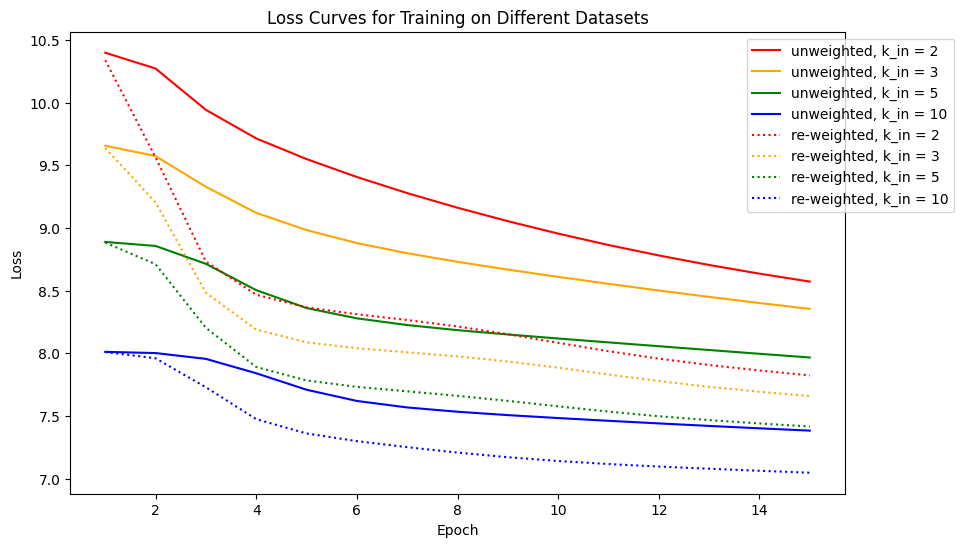

In [10]:
# Load loss data
unweighted_k_dim_to_loss_history = torch.load('data/output_data/unweighted_k_dim_to_loss_history.pth', weights_only = True)
reweighted_k_dim_to_loss_history = torch.load('data/output_data/reweighted_k_dim_to_loss_history.pth', weights_only = True)

colors = ['red', 'orange', 'green', 'blue']
line_styles = ['-', ':']
count = 0

plt.figure(figsize=(10, 6))
x_values = range(1, 16)

for (k_pair, dim), loss_history in unweighted_k_dim_to_loss_history.items():
    if dim == 20:
        plt.plot(x_values, loss_history, linestyle=line_styles[0], color=colors[count], label='unweighted, k_in = ' + str(k_pair[0]))
        count += 1

count = 0

for (k_pair, dim), loss_history in reweighted_k_dim_to_loss_history.items():
    if dim == 20:
        plt.plot(x_values, loss_history, linestyle=line_styles[1], color=colors[count], label='re-weighted, k_in = ' + str(k_pair[0]))
        count += 1
        
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), frameon=True)

plt.title("Loss Curves for Training on Different Datasets")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()